In [341]:
import yfinance as yf
import pandas as pd
import numpy as np

In [342]:
df=yf.download('^GSPC',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [343]:
df['returns']=np.log(df.Close.pct_change()+1)

In [344]:
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df['Lag_'+str(i)]=df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [345]:
lagnames=lagit(df,10)
df.dropna(inplace=True)

In [346]:
from sklearn.linear_model import LinearRegression

In [347]:
model=LinearRegression()

In [348]:
model.fit(df[lagnames],df['returns'])

LinearRegression()

In [349]:
df['prediction_LR']=model.predict(df[lagnames])

In [350]:
df['direction_LR']=[1 if i>0 else -1 for i in df.prediction_LR]

In [351]:
df['strat_LR']=df['direction_LR']*df['returns']

In [352]:
np.exp(df[['returns','strat_LR']].sum())

returns      3.502311
strat_LR    11.612742
dtype: float64

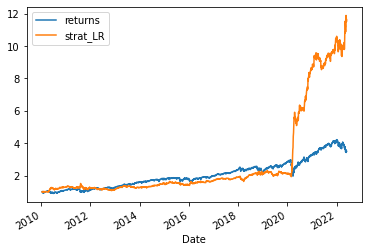

In [353]:
np.exp(df[['returns','strat_LR']].cumsum()).plot()

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
train,test=train_test_split(df,shuffle=False,test_size=0.1,random_state=0)

In [356]:
trains=train.copy()
test=test.copy()

In [357]:
model=LinearRegression()

In [358]:
model.fit(train[lagnames],train['returns'])

LinearRegression()

In [359]:
test['prediction_LR']=model.predict(test[lagnames])

In [360]:
test['direction_LR']=[1 if i>0 else -1 for i in test.prediction_LR]

In [361]:
test['strat_LR']=test['direction_LR']*test['returns']

In [362]:
np.exp(test[['returns','strat_LR']].sum())

returns     1.028019
strat_LR    1.230820
dtype: float64

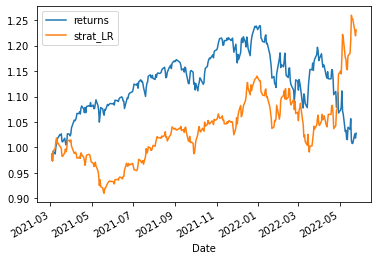

In [363]:
np.exp(test[['returns','strat_LR']].cumsum()).plot()

In [364]:
train,test=train_test_split(df,shuffle=False,test_size=0.9,random_state=0)
model=LinearRegression()
train=train.copy()
test=test.copy()

In [365]:
model.fit(train[['High','Low']],train[['Open']])
test['Open_pred']=model.predict(test[['High','Low']])

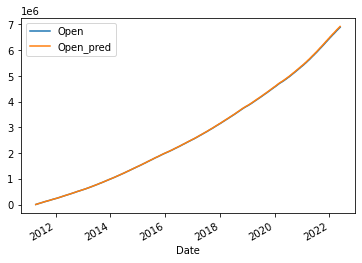

In [366]:
test[['Open','Open_pred']].cumsum().plot()